# Что вы будете видеть перед собой в течение 4 лет обучения на ВСН?

## Подготовил: Кирюхов Григорий БВСН221

Давайте представим, что вы поступили на первый курс, начнем ваш путь!

# 1 курс

## Python

### Работа с вводом и выводом програамы, а также со стороками

In [3]:
print('Hello, World!\nI am CSS student.')

Hello, World!
I am CSS student.


### Понимание различных типов дванных и логических операций

In [ ]:
print('2' == 2)

False


### Работа с массивами и массивами массивов

In [8]:
# Проход змейкой по матрице n на m
# Задача: Написать программу, которая будет проходить по матрице n на m змейкой и заполнять её числами от 1 до n*m.
n = 4
m = 5

matrix = [[0 for j in range(m)] for i in range(n)]

print('Исходная матрица:')
for i in range(n):
    for j in range(m):
        print(f'{matrix[i][j]:2}', end=' ')
    print()
print()

# Заполнение матрицы змейкой
# Чётные строки заполняем слева направо, нечётные - справа налево
# Заполнение матрицы числами от 1 до n*m
for i in range(n):
    for j in range(m):
        if i % 2 == 0:
            matrix[i][j] = i * m + j + 1
        else:
            matrix[i][m - j - 1] = i * m + j + 1

print('Заполненная матрица:')
for i in range(n):
    for j in range(m):
        print(f'{matrix[i][j]:2}', end=' ')
    print()


Исходная матрица:
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Заполненная матрица:
 1  2  3  4  5 
10  9  8  7  6 
11 12 13 14 15 
20 19 18 17 16 


## Линейная Алгебра

# Понимание векторного простарнства и того как работают векторные операции

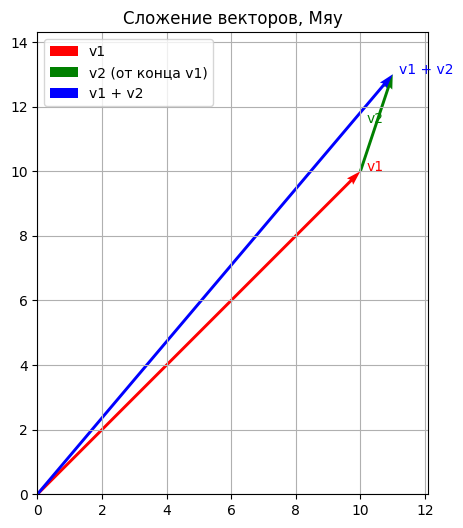

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Вектора (можно менять!)
v1 = np.array([10, 10])
v2 = np.array([1, 3])
v_sum = v1 + v2


all_points = np.array([
    [0, 0],
    v1,
    v1 + v2,
    v_sum
])
x_max, y_max = np.max(all_points, axis=0)
margin = 0.1

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, x_max * (1 + margin))
ax.set_ylim(0, y_max * (1 + margin))
ax.set_aspect('equal')


ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
ax.quiver(v1[0], v1[1], v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2 (от конца v1)')
ax.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1 + v2')


ax.text(v1[0] + 0.2, v1[1], 'v1', color='r')
ax.text(v_sum[0] + 0.2, v_sum[1], 'v1 + v2', color='b')
ax.text(v1[0] + 0.2, v1[1] + v2[1] / 2, 'v2', color='g')

ax.grid(True)
ax.legend()
ax.set_title("Сложение векторов, Мяу")

plt.show()


### Работа с разложениями (SVD)

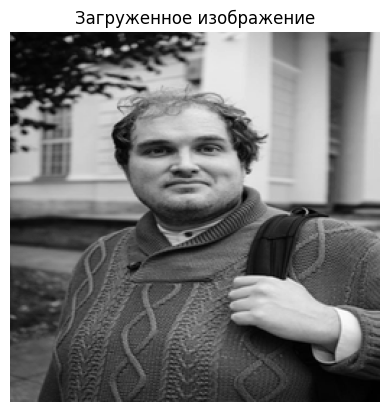

In [31]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def load_single_image(path, size=(256, 256)):
    image = Image.open(path).convert("L")              
    image = image.resize(size, Image.LANCZOS)          
    image = np.asarray(image, dtype=np.double)
    image /= np.linalg.norm(image)             
    return image

image = load_single_image("data/image.png")

plt.imshow(image, cmap='gray')
plt.title("Загруженное изображение")
plt.axis('off')
plt.show()

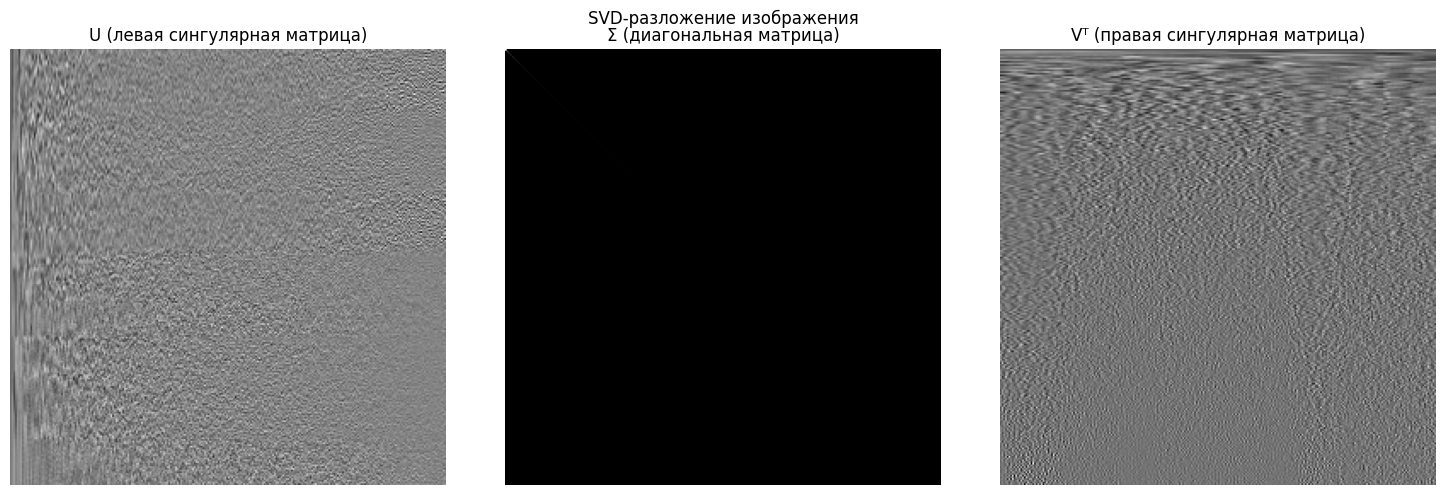

In [32]:
import matplotlib.pyplot as plt
import numpy as np

img = image

U, S, VT = np.linalg.svd(img, full_matrices=False)
Sigma = np.diag(S)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(U, cmap='gray')
axes[0].set_title("U (левая сингулярная матрица)")

axes[1].imshow(Sigma, cmap='gray')
axes[1].set_title("Σ (диагональная матрица)")

axes[2].imshow(VT, cmap='gray')
axes[2].set_title("Vᵀ (правая сингулярная матрица)")

for ax in axes:
    ax.axis("off")

plt.suptitle("SVD-разложение изображения")
plt.tight_layout()
plt.show()

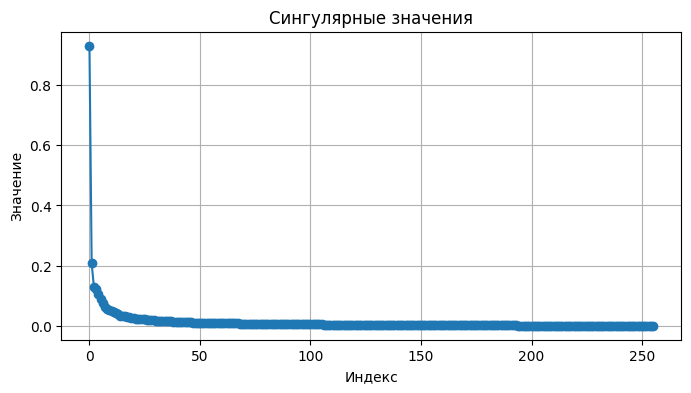

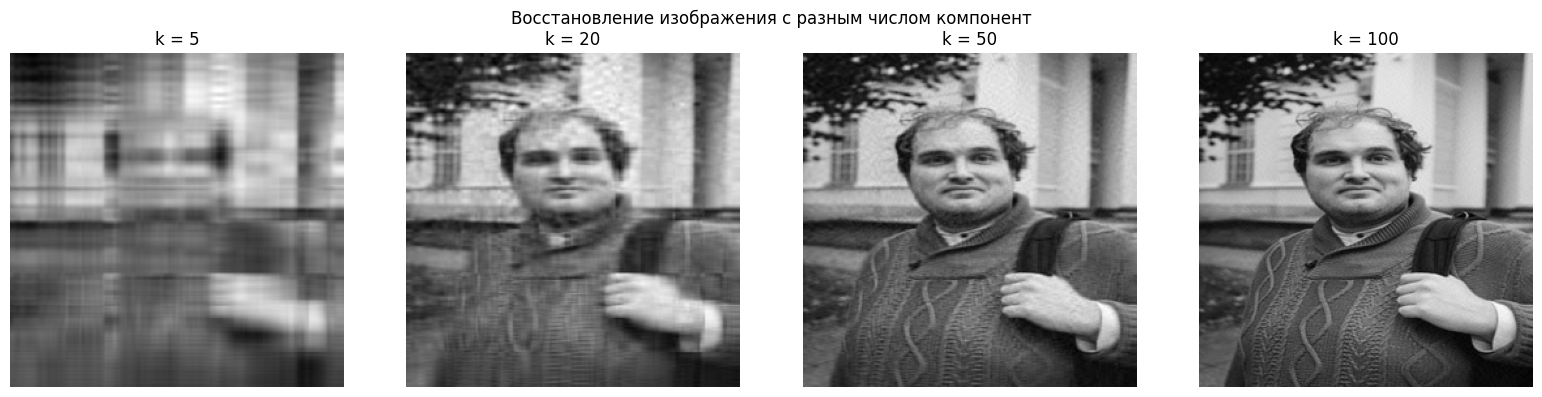

In [29]:
import matplotlib.pyplot as plt
import numpy as np

img = img

# SVD-разложение
U, S, VT = np.linalg.svd(img, full_matrices=False)

# График сингулярных значений
plt.figure(figsize=(8, 4))
plt.plot(S, marker='o')
plt.title("Сингулярные значения")
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.grid(True)
plt.show()

# Восстановление изображения с разным числом компонент
ks = [5, 20, 50, 100]
fig, axes = plt.subplots(1, len(ks), figsize=(16, 4))

for i, k in enumerate(ks):
    # Восстанавливаем изображение с первыми k компонентами
    img_approx = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]
    axes[i].imshow(img_approx, cmap='gray')
    axes[i].set_title(f"k = {k}")
    axes[i].axis("off")

plt.suptitle("Восстановление изображения с разным числом компонент")
plt.tight_layout()
plt.show()


## Дискретная Математика

### Понимаем, что такое число перестановки

In [ ]:
import plotly.graph_objects as go
import itertools

elements = ['A', 'B', 'C']
perms = list(itertools.permutations(elements))
x_positions = [0, 1, 2]
y_fixed = 0

def get_positions(perm):
    return [x_positions[perm.index(e)] for e in elements]

init_perm = perms[0]
init_x = get_positions(init_perm)

def get_counter_text(index):
    return f"Перестановка {index + 1} из {len(perms)}"

fig = go.Figure(
    data=[
        go.Scatter(
            x=init_x,
            y=[y_fixed]*3,
            mode='markers+text',
            marker=dict(size=50, color='skyblue'),
            text=elements,
            textposition='middle center',
            hoverinfo='none'
        ),
        go.Scatter(
            x=[1],
            y=[-0.8],
            text=[get_counter_text(0)],
            mode='text',
            textfont=dict(size=16),
            hoverinfo='none',
            showlegend=False
        )
    ],
    layout=go.Layout(
        xaxis=dict(range=[-1, 3], showticklabels=False, zeroline=False),
        yaxis=dict(range=[-1.2, 1], showticklabels=False, zeroline=False),
        title='Анимация перестановок (3 элемента)',
        updatemenus=[dict(type='buttons', showactive=False,
                          buttons=[dict(label='▶️ Play',
                                        method='animate',
                                        args=[None, {"frame": {"duration": 800, "redraw": True},
                                                     "fromcurrent": True}])])]
    ),
    frames=[
        go.Frame(
            data=[
                
                go.Scatter(
                    x=get_positions(perm),
                    y=[y_fixed]*3,
                    mode='markers+text',
                    marker=dict(size=50, color='skyblue'),
                    text=elements,
                    textposition='middle center',
                    hoverinfo='none'
                ),

                go.Scatter(
                    x=[1],
                    y=[-0.8],
                    text=[get_counter_text(i)],
                    mode='text',
                    textfont=dict(size=16),
                    hoverinfo='none',
                    showlegend=False
                )
            ],
            name=f"frame{i}"
        ) for i, perm in enumerate(perms)
    ]
)

fig.show()


# Понимаем, что такое число сочетаний

In [ ]:
import plotly.graph_objects as go
import math

max_n = 20

n0 = 1
x0 = list(range(n0 + 1))
y0 = [math.comb(n0, k) for k in x0]


fig = go.Figure(
    data=[
        go.Bar(x=x0, y=y0, text=y0, textposition='outside')
    ],
    layout=go.Layout(
        title=f"Число сочетаний C(n, k), n = {n0}",
        xaxis=dict(title="k", dtick=1, range=[-0.5, max_n + 0.5]),
        yaxis=dict(title="C(n, k)", range=[0, math.comb(max_n, max_n // 2) * 1.2]),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='▶️ Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 800, "redraw": True},
                                       "fromcurrent": True}])]
        )]
    ),
    frames=[
        go.Frame(
            data=[
                go.Bar(
                    x=list(range(n + 1)),
                    y=[math.comb(n, k) for k in range(n + 1)],
                    text=[math.comb(n, k) for k in range(n + 1)],
                    textposition='outside'
                )
            ],
            layout=go.Layout(
                title_text=f"Число сочетаний C(n, k), n = {n}"
            ),
            name=f"frame{n}"
        )
        for n in range(1, max_n + 1)
    ]
)

fig.show()


## Алгоритмы 1

In [ ]:
import plotly.graph_objects as go
import random

# Генерация случайного массива
array = list(range(1, 10))
random.shuffle(array)

steps = [array.copy()]
labels = ["Начало"]

# Пузырьковая сортировка с записью шагов
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    count = 0
    for i in range(n):
        for j in range(n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                steps.append(a.copy())
                count += 1
                labels.append(f"Проход {i + 1}, обмен {count}")
    return a

bubble_sort(array)

frames = []
for step, label in zip(steps, labels):
    frames.append(
        go.Frame(
            data=[
                go.Bar(
                    x=list(range(len(step))),
                    y=step,
                    text=step,
                    textposition='inside',
                    hoverinfo='text'
                )
            ],
            layout=go.Layout(
                title_text=f"Анимация пузырьковой сортировки<br>{label}",
                xaxis=dict(
                    tickmode='array',
                    tickvals=list(range(len(step))),
                    ticktext=[str(v) for v in step],
                    title="Значения элементов (x — позиция в массиве)"
                )
            )
        )
    )

fig = go.Figure(
    data=[
        go.Bar(
            x=list(range(len(array))),
            y=steps[0],
            text=steps[0],
            textposition='inside'
        )
    ],
    layout=go.Layout(
        title=f"Анимация пузырьковой сортировки<br>{labels[0]}",
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(len(array))),
            ticktext=[str(v) for v in steps[0]],
            title="Значения элементов (x — позиция в массиве)"
        ),
        yaxis=dict(title="Высота элемента"),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="▶️ Play", method="animate",
                          args=[None, {"frame": {"duration": 100, "redraw": True},
                                       "fromcurrent": True}])]
        )]
    ),
    frames=frames
)

fig.show()


In [10]:
import plotly.graph_objects as go
import random


array = list(range(1, 10))
random.shuffle(array)

steps = [array.copy()]
labels = ["Начало"]
step_count = 0 

def quick_sort(arr, low, high):
    global step_count
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index - 1)
        quick_sort(arr, pivot_index + 1, high)

def partition(arr, low, high):
    global step_count
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            steps.append(arr.copy())
            step_count += 1
            labels.append(f"Обмен {step_count}")
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    steps.append(arr.copy())
    step_count += 1
    labels.append(f"Обмен {step_count}")
    return i + 1

arr_copy = array.copy()
quick_sort(arr_copy, 0, len(arr_copy) - 1)

frames = []
for step, label in zip(steps, labels):
    frames.append(
        go.Frame(
            data=[
                go.Bar(
                    x=list(range(len(step))),
                    y=step,
                    text=step,
                    textposition='inside',
                    hoverinfo='text'
                )
            ],
            layout=go.Layout(
                title_text=f"Анимация быстрой сортировки<br>{label}",
                xaxis=dict(
                    tickmode='array',
                    tickvals=list(range(len(step))),
                    ticktext=[str(v) for v in step],
                    title="Значения элементов (x — позиция в массиве)"
                )
            )
        )
    )

fig = go.Figure(
    data=[
        go.Bar(
            x=list(range(len(array))),
            y=steps[0],
            text=steps[0],
            textposition='inside'
        )
    ],
    layout=go.Layout(
        title=f"Анимация быстрой сортировки<br>{labels[0]}",
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(len(array))),
            ticktext=[str(v) for v in steps[0]],
            title="Значения элементов (x — позиция в массиве)"
        ),
        yaxis=dict(title="Высота элемента"),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="▶️ Play", method="animate",
                          args=[None, {"frame": {"duration": 300, "redraw": True},
                                       "fromcurrent": True}])])
        ]
    ),
    frames=frames
)

fig.show()


## Математический Анализ

### Понимаем как приближать нелинейные функции линейными

In [9]:
import numpy as np
import plotly.graph_objects as go
import math

def sin_target(x):
    return np.sin(x)


def taylor_sin(x, n_terms):
    approx = np.zeros_like(x)
    for k in range(n_terms):
        coeff = (-1)**k / math.factorial(2 * k + 1)
        approx += coeff * x**(2 * k + 1)
    return approx

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
true_y = sin_target(x)
max_terms = 10

frames = []
for n in range(1, max_terms + 1):
    approx_y = taylor_sin(x, n)
    frames.append(go.Frame(
        data=[
            go.Scatter(x=x, y=true_y, mode='lines', name='sin(x)', line=dict(color='gray', dash='dash')),
            go.Scatter(x=x, y=approx_y, mode='lines', name=f'Tейлор, n={n}', line=dict(color='blue'))
        ],
        name=f"frame{n}",
        layout=go.Layout(title_text=f"Ряд Тейлора для sin(x), n = {n}")
    ))


fig = go.Figure(
    data=[
        go.Scatter(x=x, y=true_y, mode='lines', name='sin(x)', line=dict(color='gray', dash='dash')),
        go.Scatter(x=x, y=taylor_sin(x, 1), mode='lines', name='Тейлор, n=1', line=dict(color='blue'))
    ],
    layout=go.Layout(
        title="Ряд Тейлора для sin(x)",
        xaxis=dict(title='x', range=[-2 * np.pi, 2 * np.pi]),
        yaxis=dict(title='y', range=[-2, 2]),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="▶️ Play", method="animate",
                          args=[None, {"frame": {"duration": 600, "redraw": True},
                                       "fromcurrent": True}])]
        )]
    ),
    frames=frames
)

fig.show()


## Алгоритмы 2

In [ ]:
import plotly.graph_objects as go
import networkx as nx
import heapq

G = nx.DiGraph()
edges = [
    ('A', 'B', 7),
    ('A', 'C', 9),
    ('A', 'E', 14),
    ('B', 'D', 10),
    ('C', 'F', 2),
    ('C', 'D', 11),
    ('D', 'E', 9),
    ('D', 'F', 6)
]
G.add_weighted_edges_from(edges)

pos = {
    'A': (-1, 1),
    'B': (0, 2),
    'C': (-1, -1),
    'D': (1, 1),
    'E': (2, 0),
    'F': (0, -2),
}

def dijkstra_steps(graph, start):
    steps = []
    dist = {node: float('inf') for node in graph.nodes}
    prev = {}
    visited = set()
    dist[start] = 0
    heap = [(0, start)]

    while heap:
        d, u = heapq.heappop(heap)
        if u in visited:
            continue
        visited.add(u)
        steps.append((u, dist.copy(), prev.copy(), visited.copy()))
        for v in graph.neighbors(u):
            w = graph[u][v]['weight']
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(heap, (dist[v], v))
    return steps

steps = dijkstra_steps(G, 'A')
final_prev = steps[-1][2]

def generate_figure(dist, prev, current, visited, show_final_path=False):
    edge_traces = []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        color = 'red' if show_final_path and final_prev.get(v) == u else 'gray'
        width = 4 if color == 'red' else 2
        edge_traces.append(go.Scatter(
            x=[x0, x1], y=[y0, y1],
            mode='lines',
            line=dict(color=color, width=width),
            hoverinfo='none',
            showlegend=False
        ))

    node_x = []
    node_y = []
    node_text = []
    node_color = []
    for node in G.nodes():
        x, y = pos[node]
        d = dist[node]
        label = f"{node}<br>d={int(d) if d < float('inf') else '∞'}"
        node_x.append(x)
        node_y.append(y)
        node_text.append(label)
        if node == current:
            node_color.append('orange')
        elif node in visited:
            node_color.append('lightgreen')
        else:
            node_color.append('skyblue')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        marker=dict(size=40, color=node_color, line=dict(color='black', width=1)),
        text=node_text,
        textposition='middle center',
        hoverinfo='text',
        showlegend=False
    )

    return edge_traces + [node_trace]

frames = []
for i, (curr, dist, prev, visited) in enumerate(steps):
    traces = generate_figure(dist, prev, curr, visited)
    frames.append(go.Frame(
        data=traces,
        name=f"Шаг {i+1}",
        layout=go.Layout(title_text=f"Алгоритм Дейкстры — шаг {i+1}, вершина {curr}")
    ))

traces = generate_figure(steps[-1][1], steps[-1][2], None, steps[-1][3], show_final_path=True)
frames.append(go.Frame(
    data=traces,
    name="Готово",
    layout=go.Layout(title_text=f"Финальные кратчайшие пути от A")
))

init_traces = generate_figure(steps[0][1], steps[0][2], steps[0][0], steps[0][3])

fig = go.Figure(
    data=init_traces,
    layout=go.Layout(
        title="Алгоритм Дейкстры — старт с вершины A",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        width=1000,
        height=600,
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="▶️ Play", method="animate",
                                        args=[None, {"frame": {"duration": 1500, "redraw": True},
                                                     "fromcurrent": True}])])]
    ),
    frames=frames
)

fig.show()


# 2 Курс

## Математическая статистика и теория вероятности!

Давайте проверим смешную гипотезу о росте абитуриентов

- Нулевая гипотеза : рост = 150 см;

- Альтернативная гипотеза : рост ≠ 150 см (двусторонний тест);



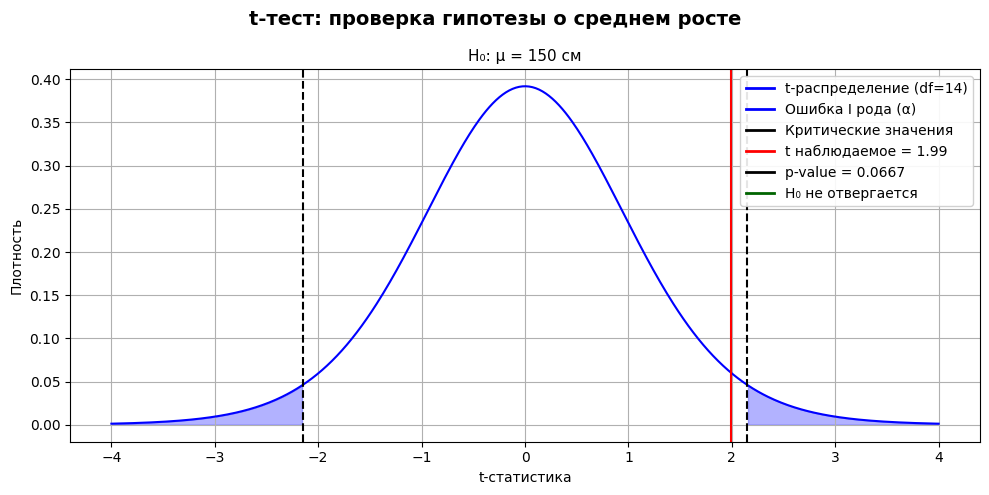

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp

mu_0 = 150
n = 15
sigma = 10
alpha = 0.05

np.random.seed(42)
sample = np.random.normal(loc=155, scale=sigma, size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
df = n - 1

t_stat, p_value = ttest_1samp(sample, mu_0)
reject = p_value < alpha
decision = "H₀ отвергается" if reject else "H₀ не отвергается"
decision_color = "crimson" if reject else "darkgreen"

t_crit = t.ppf(1 - alpha/2, df)
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label=f"t-распределение (df={df})", color='blue')

x_alpha_left = x[x < -t_crit]
x_alpha_right = x[x > t_crit]
plt.fill_between(x_alpha_left, 0, t.pdf(x_alpha_left, df), color='blue', alpha=0.3)
plt.fill_between(x_alpha_right, 0, t.pdf(x_alpha_right, df), color='blue', alpha=0.3)

plt.axvline(-t_crit, color='black', linestyle='--')
plt.axvline(t_crit, color='black', linestyle='--', label='Критические значения')

plt.axvline(t_stat, color='red', linestyle='-', label=f"t наблюдаемое = {t_stat:.2f}")

plt.suptitle("t-тест: проверка гипотезы о среднем росте", fontsize=14, fontweight='bold')
plt.title(f"H₀: μ = 150 см", fontsize=11)

plt.xlabel("t-статистика")
plt.ylabel("Плотность")

legend_labels = [
    f"t-распределение (df={df})",
    "Ошибка I рода (α)",
    "Критические значения",
    f"t наблюдаемое = {t_stat:.2f}",
    f"p-value = {p_value:.4f}",
    decision
]
legend_colors = ['blue', 'blue', 'black', 'red', 'black', decision_color]
legend_lines = [plt.Line2D([0], [0], color=c, lw=2) for c in legend_colors]
plt.legend(legend_lines, legend_labels, loc='upper right', fontsize=10, framealpha=0.9)

plt.grid(True)
plt.tight_layout()
plt.show()


# 3 курс!

## Времянные ряды

### Задание 3.1
Постройте график временного ряда и его автокорреляционную функцию. Является ли рассматриваемый процесс стационарным?

In [16]:
import pandas as pd

df = pd.read_excel('data/tsa_ha1.xlsx')

df.head()

,y
0,53.514318
1,-64.452347
2,36.312859
3,-46.979426
4,-55.553725


Давайте добавим немного красоты и построим врямянной промежуток все-таки

In [17]:
df['date'] = pd.date_range(start='1/1/1935', periods=len(df), freq='ME')

df.set_index('date', inplace=True)

df

,y
date,
1935-01-31,53.514318
1935-02-28,-64.452347
1935-03-31,36.312859
1935-04-30,-46.979426
1935-05-31,-55.553725
...,...
1998-06-30,555.261757
1998-07-31,563.867481
1998-08-31,491.975954


Построим график времянного ряда

<Axes: title={'center': 'График рандомного временного ряда'}, xlabel='date'>

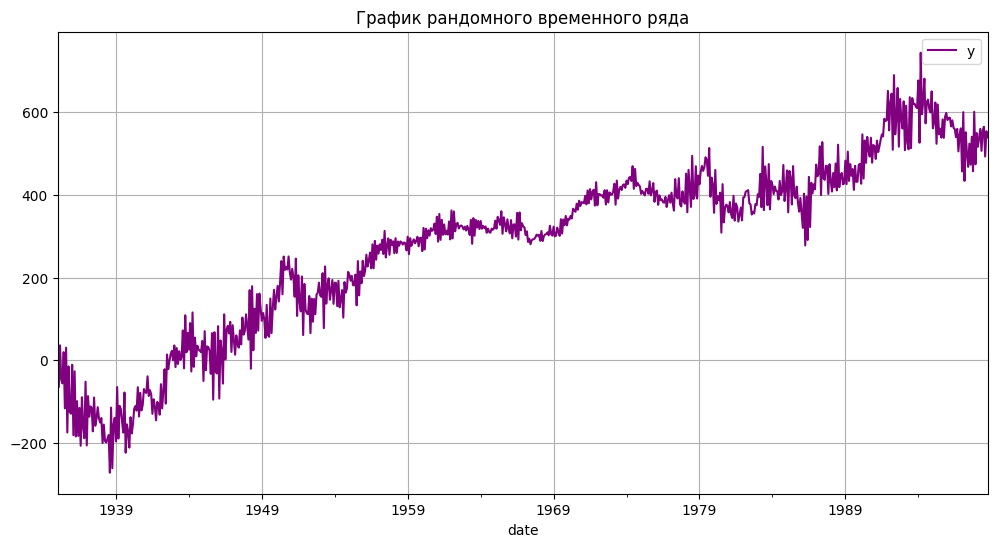

In [18]:
df.plot(figsize=(12, 6), color='purple',  title='График рандомного временного ряда', grid=True)

Проведем тест Дикифулера для проверки на стационарность, хотя по графикам и так видно

Спасибо https://medium.com/@kylejones_47003/dickey-fuller-test-for-stationarity-in-time-series-with-python-4e4bf1953eed

In [19]:
from statsmodels.tsa.stattools import adfuller

# H_0 - ряд стационарен
# H_1 - ряд нестационарен

result = adfuller(df['y'])
print(f'ADF статистика: {result[0]}')
print(f'p-value: {result[1]}')

ADF статистика: -1.576839847396461
p-value: 0.495216292629862


$H_0$ отвергается => ряд нестационарный, что было видно еще из графиков

Окей, давайте попробуем взять первую разницу в средних и проверить

In [22]:
df['y_diff'] = df['y'].diff()
df['y_diff'] = df['y_diff'].dropna()

result_diff = adfuller(df['y_diff'].dropna())
print(f'ADF статистика: {result_diff[0]}')
print(f'p-value: {result_diff[1]:.3f}')


ADF статистика: -8.805779135647727
p-value: 0.000


О! 1 разницы хватило, давайте посмотрим на график и данные

<Axes: title={'center': 'График рандомного временного ряда первая разница'}, xlabel='date'>

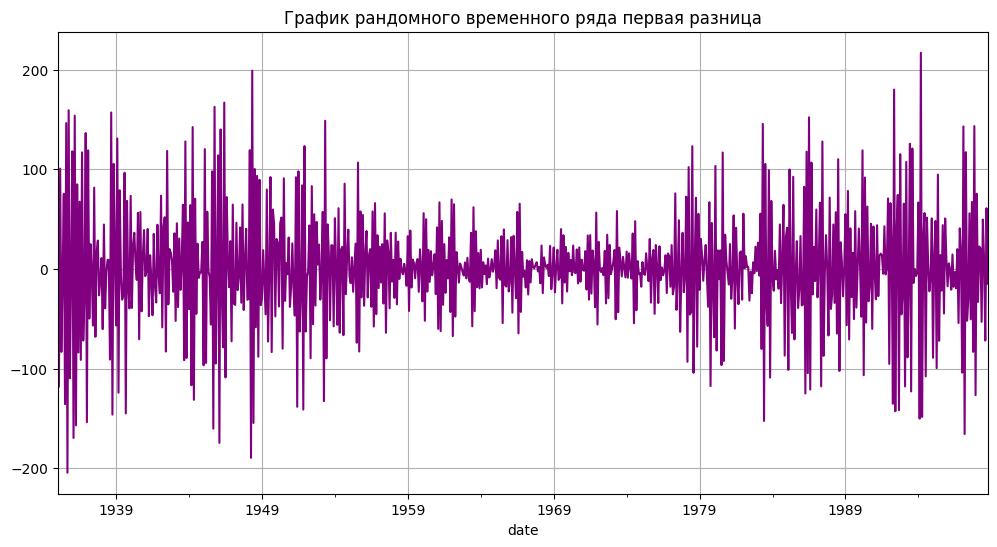

In [23]:
df['y_diff'].plot(figsize=(12, 6), color='purple',  title='График рандомного временного ряда первая разница', grid=True)

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

diff = df['y_diff'].dropna()

p_max = 5
q_max = 5

best_aic = np.inf
best_order = None
best_model = None

for p in range(p_max + 1):
    for q in range(q_max + 1):
        try:
            model = SARIMAX(diff, order=(p, 0, q), trend='n').fit(disp=False)
            current_aic = model.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = (p, q)
                best_model = model
        except:
            continue

print("Лучшая модель ARMA(p,q):", best_order)

print(best_model.summary())

C:\Users\kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueW

Лучшая модель ARMA(p,q): (2, 2)
                               SARIMAX Results                                
Dep. Variable:                 y_diff   No. Observations:                  765
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -3471.970
Date:                Sat, 29 Mar 2025   AIC                           6953.940
Time:                        05:13:39   BIC                           6977.139
Sample:                    02-28-1935   HQIC                          6962.871
                         - 10-31-1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9680      0.030    -32.235      0.000      -1.027      -0.909
ar.L2         -0.4966      0.030    -16.439      0.000      -0.556      -0.437
ma.L1         -0.392

C:\Users\kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



``Лучшая модель ARMA(p,q): (2, 2)``

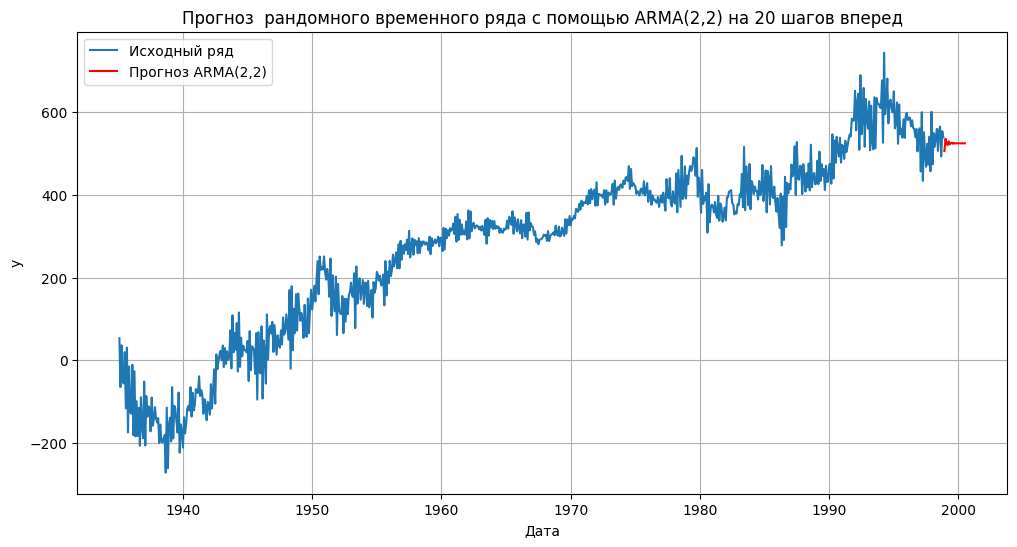

In [25]:
forecast_steps = 20
forecast_object = best_model.get_forecast(steps=forecast_steps)
forecast_diff = forecast_object.predicted_mean

last_value = df['y'].iloc[-1]

forecast_y = [last_value]

for diff_val in forecast_diff:
    next_val = forecast_y[-1] + diff_val
    forecast_y.append(next_val)

forecast_index = pd.date_range(
    start=df.index[-1], 
    periods=forecast_steps+1,
    freq='ME'
)[1:]

forecast_y_series = pd.Series(forecast_y[1:], index=forecast_index)

plt.figure(figsize=(12, 6))

plt.plot(df['y'], label='Исходный ряд')

plt.plot(forecast_y_series, label='Прогноз ARMA(2,2)', color='red')

plt.title('Прогноз  рандомного временного ряда с помощью ARMA(2,2) на 20 шагов вперед')
plt.xlabel('Дата')
plt.grid()
plt.ylabel('y')
plt.legend()
plt.show()

# Машинное и глубинное оубчения (Спасибо Паше Малову за код)

In [76]:
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

def make_grid(clf, X, y):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xrange= np.arange(x_min, x_max, plot_step)
    yrange = np.arange(y_min, y_max, plot_step)
    xx, yy = np.meshgrid(xrange,
                         yrange)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    return xrange, yrange, Z

name_to_idx = {"Circles":0,"Moons": 1,"Classification": 2}
app = Dash(__name__)

app.layout = html.Div(

    [
        html.P("Выбрать датасет:", style={
            "font-family":"Arial",
            'font-size':'20px',
            "color":"white"
        }),
        dcc.Dropdown(
            id="dropdown",
            options = ["Circles", "Moons", "Classification"],
            value="Circles",
            style={"font-family":"Arial", "font-size":"16px"}
        ),
        html.Div([
        html.P( id="train", style={"font-family":"Arial", 'font-size': '20px', 'color': 'white'}),
        html.P( id="test", style={"font-family":"Arial", 'font-size': '20px', 'color': 'white'}),
    ]),
        dcc.Graph(id="graph"),
        html.P("Выберите max_depth дерева:",
               style={"font-family":"Arial", "font-size":"16px","color":"white"}), 
        dcc.Slider(
            id="max_depth",
            min = 1,
            max=20,
            step=1,
            value=1,
            marks={i: str(i) for i in range(1, 21, 5)}
        ),
        html.P("Выберите min_sample_leaf дерева:",
               style={"font-family":"Arial", "font-size":"16px","color":"white"}),
        dcc.Slider(
            id="min_samples_leaf",
            min=1,
            max=40,
            step=1,
            value=1,
            marks={i: str(i) for i in range(1, 41, 5)}
        ),
        
    ]
)

@app.callback(
    Output("graph", "figure"),
    Output("train", "children"),
    Output("test", "children"),
    Input("dropdown", "value"),
    Input("max_depth", "value"),
    Input("min_samples_leaf", "value")
)
def train_and_display(name, max_depth, min_samples_leaf):
    index = name_to_idx[name]
    X, y = datasets[index]
    X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

    clf = model.fit(X_train, y_train)
    xrange, yrange, Z = make_grid(clf, X, y)
    trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]
    if index == 2:
        trace_specs += [[X_train, y_train, '2', "Train",'diamond'] , [X_test, y_test, '2', "Train",'diamond-dot']]


    
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    
    cmap = ListedColormap(palette)

    fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker, marker_color=[cmap.colors.as_hex()[int(i)] for i in y[y==label]] 
    )
    for X, y, label, split, marker in trace_specs
])
    
    fig.update_layout(
        height=600,
        width=800
    )


    fig.add_trace(
        go.Contour(
            x=xrange,
            y=yrange,
            z=Z,
            colorscale=cmap.colors.as_hex(),
            showscale=False,
            opacity=0.4,
            name='Score',
            hoverinfo='skip'

        )
    )

    train_accuracy = f"Train Accuracy: {accuracy_score(y_train, model.predict(X_train)):.2f}"
    test_accuracy = f"Test Accuracy: {accuracy_score(y_test, model.predict(X_test)):.2f}"
    
    return fig, train_accuracy, test_accuracy


app.run_server(debug=True)
